In [1]:
#import tensorflow as tf
#import tensorflow.contrib.eager as tfe
import numpy as np
import pandas as pd
import pickle
from timeit import default_timer as timer
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
import nltk as nltk

import re
import os

### Actions performed
#### Prototype how to load the wall street journal data. 
#### Evaluation methods to compare trees
#### comparison with google word vectors and convert words which are not there to UNK or some other symbol

# Load training and test dataset

#### Use BracketParse corpus reader to load the wall street journal data
#### functions subtrees(), label(), leaves() are important
#### checkout load-penn-treebank-dataset.py for protoypes

In [2]:
dirname = os.getcwd()
dirname = os.path.dirname(dirname)
dataset_path = os.path.join(dirname, 'datasets/')
print(dataset_path)

/media/kandy/hdd/master-thesis/constituency-parsing/datasets/


In [3]:
## https://www.nltk.org/_modules/nltk/tree.html
## http://www.nltk.org/howto/tree.html
## above link contains the API and also some tutorials

#reader = nltk.corpus.BracketParseCorpusReader('.','SWB-all-sentences-original-with-punctuation.MRG')
reader = nltk.corpus.BracketParseCorpusReader(dataset_path,'WSJ.txt')
print(reader.fileids())
print(type(reader))

## reads the file and converts each line into a tree
trees = reader.parsed_sents()
print('No. of trees: ', len(trees))
print(type(trees[0]))

['WSJ.txt']
<class 'nltk.corpus.reader.bracket_parse.BracketParseCorpusReader'>
No. of trees:  49208
<class 'nltk.tree.Tree'>


### Evaluation methods to compare trees
#### equality operator (==) is good enough to compare trees. When comparing both the tree and tree label is taken into account
#### Initial methods will not have categorization classification technique. So, it is important to replace all the values with say UNK symbol of google corpus
#### It is created in such a way that subcategories of punctuations are named by itself

In [4]:
## getting the category list

categories_set = set()
for tree in trees:
    for sub_tree in tree.subtrees():
        categories_set.add(sub_tree.label())
        #sub_tree = sub_tree.set_label('DC')
print(categories_set)

{'ADJP-PRD-4', 'WHNP-152', 'NP-SBJ-234', 'PP=2', 'WHNP-130', 'ADJP-PRD-TPC-3', 'S-PRP-TPC-2', 'WHNP-13', 'WHNP-237', 'WHNP-5', 'WHNP-170', 'WHNP-235', 'NP-SBJ-201', 'SBAR-NOM-PRD', 'VBD', 'WHNP-259', 'WHNP-1968', 'WHNP-178', 'FRAG', 'PP-TMP', 'NP-3', 'WHNP-263', 'WHNP-39', 'PP-CLR=5', 'NP-TPC', 'SBAR-PUT', 'PP-PRD-LOC-TPC-2', 'SBAR-TMP', 'LST', 'ADVP-LOC', 'S-ADV', 'SYM', 'WHNP-220', 'NP-SBJ-206', 'NP-SBJ-259', 'WHNP-136', 'NP-SBJ-204', 'S-PRP', 'S-2', 'SBAR-NOM', 'RP', 'NP-SBJ-50', 'INTJ', 'WHNP-207', 'PP-TMP-CLR', 'SBAR-TMP-PRD', 'SBAR-PRP=2', 'WHNP-296', 'WHNP-261', 'PP-LOC=2', 'ADVP-LOC-PRD-1', 'NP-SBJ-51', 'WHNP-65', 'WHNP-71', 'NP-SBJ-99', 'SQ-TPC-1', 'ADVP-TMP-CLR', 'NP-SBJ-165', 'PP-CLR-2', 'WHNP-305', 'NP-HLN', 'WHNP-198', 'NP-EXT-1', 'NP-SBJ-96', 'NP-SBJ-68', 'NP-SBJ-12', 'NP-ADV-1', 'WHNP-60', 'NP-SBJ-153', 'PP-PRD=1', 'WHNP-154', 'ADJP-HLN', 'WHNP-144', 'PP-PRP-PRD', 'PP-PRP-3', 'PP-LOC-TPC-PRD-1', 'ADJP-PRD=3', 'WHNP-8', 'ADVP-LOC-TPC', 'NP-SBJ-139', 'WHNP-209', 'SBAR-NOM-

In [5]:
categories_list = list(categories_set)
categories_list

['ADJP-PRD-4',
 'WHNP-152',
 'NP-SBJ-234',
 'PP=2',
 'WHNP-130',
 'ADJP-PRD-TPC-3',
 'S-PRP-TPC-2',
 'WHNP-13',
 'WHNP-237',
 'WHNP-5',
 'WHNP-170',
 'WHNP-235',
 'NP-SBJ-201',
 'SBAR-NOM-PRD',
 'VBD',
 'WHNP-259',
 'WHNP-1968',
 'WHNP-178',
 'FRAG',
 'PP-TMP',
 'NP-3',
 'WHNP-263',
 'WHNP-39',
 'PP-CLR=5',
 'NP-TPC',
 'SBAR-PUT',
 'PP-PRD-LOC-TPC-2',
 'SBAR-TMP',
 'LST',
 'ADVP-LOC',
 'S-ADV',
 'SYM',
 'WHNP-220',
 'NP-SBJ-206',
 'NP-SBJ-259',
 'WHNP-136',
 'NP-SBJ-204',
 'S-PRP',
 'S-2',
 'SBAR-NOM',
 'RP',
 'NP-SBJ-50',
 'INTJ',
 'WHNP-207',
 'PP-TMP-CLR',
 'SBAR-TMP-PRD',
 'SBAR-PRP=2',
 'WHNP-296',
 'WHNP-261',
 'PP-LOC=2',
 'ADVP-LOC-PRD-1',
 'NP-SBJ-51',
 'WHNP-65',
 'WHNP-71',
 'NP-SBJ-99',
 'SQ-TPC-1',
 'ADVP-TMP-CLR',
 'NP-SBJ-165',
 'PP-CLR-2',
 'WHNP-305',
 'NP-HLN',
 'WHNP-198',
 'NP-EXT-1',
 'NP-SBJ-96',
 'NP-SBJ-68',
 'NP-SBJ-12',
 'NP-ADV-1',
 'WHNP-60',
 'NP-SBJ-153',
 'PP-PRD=1',
 'WHNP-154',
 'ADJP-HLN',
 'WHNP-144',
 'PP-PRP-PRD',
 'PP-PRP-3',
 'PP-LOC-TPC-PRD-1',
 

In [6]:
#categories_list.sort(lambda x,y: cmp(len(x), len(y)))
categories_list.sort(key=lambda x : len(x), reverse=True) 
# It is important to sort in descending order for regular expression to work properly

categories_list

['ADVP-LOC-TPC-PRD-1',
 'ADVP-LOC-PRD-TPC-2',
 'ADVP-LOC-CLR-TPC-2',
 'ADVP-PRD-LOC-TPC-1',
 'ADVP-LOC-PRD-TPC-4',
 'ADVP-LOC-PRD-TPC-3',
 'ADVP-LOC-PRD-TPC-1',
 'ADVP-TMP-CLR-TPC-1',
 'PP-PRD-LOC-TPC-2',
 'PP-LOC-TPC-PRD-1',
 'PP-LOC-PRD-TPC-2',
 'NP-LOC-TPC-PRD-1',
 'NP-LOC-PRD-TPC-2',
 'PP-LOC-PRD-TPC-3',
 'PP-TPC-LOC-PRD-1',
 'PP-LOC-PRD-TPC-1',
 'PP-LOC-CLR-TPC-1',
 'PP-LOC-CLR-TPC-4',
 'PP-PRD-LOC-TPC-1',
 'ADJP-PRD-TPC-3',
 'ADVP-LOC-PRD-1',
 'SBAR-NOM-TPC-3',
 'ADVP-CLR-TPC-3',
 'ADJP-TPC-PRD-1',
 'SBAR-NOM-TPC-2',
 'ADJP-PRD-TPC-2',
 'ADVP-DIR-TPC-2',
 'SBAR-NOM-SBJ-1',
 'SBAR-PRD-TPC-2',
 'ADVP-PRD-TPC-1',
 'ADVP-DIR-TPC-4',
 'ADVP-PRD-TPC-2',
 'SBAR-ADV-TPC-1',
 'FRAG-TTL-SBJ-1',
 'ADVP-CLR-TPC-1',
 'ADVP-PUT-TPC-4',
 'SBAR-NOM-SBJ-2',
 'SBAR-NOM-SBJ-5',
 'ADVP-LOC-PRD=1',
 'SBAR-DIR-TPC-2',
 'ADVP-TPC-PRD-1',
 'ADJP-PRD-TPC-1',
 'ADVP-MNR-TPC-1',
 'ADVP-LOC-TPC-2',
 'ADVP-LOC-TPC-1',
 'ADVP-PRD-TPC-3',
 'ADVP-PRD-LOC=3',
 'ADVP-TMP-TPC-1',
 'ADJP-PRD-TPC-5',
 'SBAR-NOM-SBJ-

In [7]:
#convert everything to lowercase
# use regular expression to replace the category set with UNK symbol of google corpus
UNK = '</s>' # this is the symbol for UNK in google corpus

big_regex = re.compile('|'.join(map(re.escape, categories_list)))
the_message = big_regex.sub(UNK, str(trees[0]))
the_message.lower()

'(</s>\n  (</s>\n    (</s>\n      (</s> (</s> pierre) (</s> vinken))\n      (</s> </s>)\n      (</s> (</s> (</s> 61) (</s> years)) (</s> old))\n      (</s> </s>))\n    (</s>\n      (</s> will)\n      (</s>\n        (</s> join)\n        (</s> (</s> the) (</s> board))\n        (</s> (</s> as) (</s> (</s> a) (</s> nonexecutive) (</s> director)))\n        (</s> (</s> nov</s>) (</s> 29))))\n    (</s> </s>)))'

In [8]:
trees_no_categories = [big_regex.sub(UNK, str(tree)).lower() for tree in trees]
trees_no_categories[0]

'(</s>\n  (</s>\n    (</s>\n      (</s> (</s> pierre) (</s> vinken))\n      (</s> </s>)\n      (</s> (</s> (</s> 61) (</s> years)) (</s> old))\n      (</s> </s>))\n    (</s>\n      (</s> will)\n      (</s>\n        (</s> join)\n        (</s> (</s> the) (</s> board))\n        (</s> (</s> as) (</s> (</s> a) (</s> nonexecutive) (</s> director)))\n        (</s> (</s> nov</s>) (</s> 29))))\n    (</s> </s>)))'

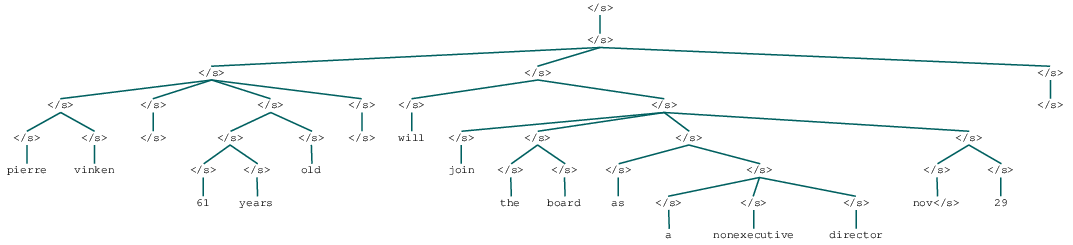

In [9]:
temp_trees = [nltk.Tree.fromstring(tree_string) for tree_string in trees_no_categories]
temp_trees[0]

In [10]:
# when list is serialized it is messy. So convert it into a sentence and save it

treesDict = [{'sentence': ' '.join(tree.leaves()), 'tree':tree} for tree in temp_trees]
treeDataframe = pd.DataFrame(data=treesDict, columns=['sentence', 'tree'])
treeDataframe.head()

,sentence,tree
0,pierre vinken </s> 61 years old </s> will join...,"[[[(</s> (</s> pierre) (</s> vinken)), (</s> <..."
1,mr</s> vinken is chairman of elsevier n</s>v</...,"[[[(</s> mr</s>), (</s> vinken)], [(</s> is), ..."
2,rudolph agnew </s> 55 years old and former cha...,"[[[(</s> (</s> rudolph) (</s> agnew)), (</s> <..."
3,a form of asbestos once used * * to make kent ...,[[[(</s>\n (</s>\n (</s> (</s> a) (</s> fo...
4,the asbestos fiber </s> crocidolite </s> is un...,[[[(</s>\n (</s> (</s> the) (</s> asbestos) (...


### Convert the words which does not appear in Google word embeddings with UNK or other symbol
As suggested in 'check-embeddings-wallstreet-coverage' google word embeddings are better than glove embeddings

In [11]:
googleVocab = pd.read_csv(dataset_path+'google-vocab.txt', sep=' ', header=None)
googleVocab.columns = ['word', 'index']
print(googleVocab.head())

google_vocab_list = googleVocab['word'].values.tolist()
#google_vocab_list = [str(word).lower() for word in google_vocab_list] # lower casing resulted in 1965718
google_vocab_set = set(google_vocab_list)
print(len(google_vocab_set))

   word    index
0  </s>  3000000
1    in  2999999
2   for  2999998
3  that  2999997
4    is  2999996
2168992


In [12]:
treeData_with_replacement = treeDataframe.copy()
UNK = '</s>' # this is the symbol for UNK in google corpus

def convert_non_occurrent_corpus_with_unk(sentence):
    words = sentence.split() 
    words = [word if word in google_vocab_set else UNK for word in words]
    new_sentence = ' '.join(words) # convert back to a sentence
    return new_sentence

treeData_with_replacement['sentence'] = treeData_with_replacement['sentence'].apply(convert_non_occurrent_corpus_with_unk)
treeData_with_replacement.head()

,sentence,tree
0,pierre </s> </s> </s> years old </s> will join...,"[[[(</s> (</s> pierre) (</s> vinken)), (</s> <..."
1,</s> </s> is chairman </s> </s> </s> </s> the ...,"[[[(</s> mr</s>), (</s> vinken)], [(</s> is), ..."
2,</s> </s> </s> </s> years old </s> former chai...,"[[[(</s> (</s> rudolph) (</s> agnew)), (</s> <..."
3,</s> form </s> asbestos once used * * </s> mak...,[[[(</s>\n (</s>\n (</s> (</s> a) (</s> fo...
4,the asbestos fiber </s> </s> </s> is unusually...,[[[(</s>\n (</s> (</s> the) (</s> asbestos) (...


## Need to go through the tree and convert all the leave node values to UNK which is not present in google vectors - YET TO BE DONE

In [13]:
treeData_with_replacement.to_csv(dataset_path+'constituency-parsing-data-all-UNK.csv', sep=' ', index=False, header=False)

In [14]:
load_treeData = pd.read_csv(dataset_path+'constituency-parsing-data-all-UNK.csv', sep=' ', header=None, )
load_treeData.columns =['sentence', 'tree']
load_treeData.head()

,sentence,tree
0,pierre </s> </s> </s> years old </s> will join...,(</s>\n (</s>\n (</s>\n (</s> (</s> p...
1,</s> </s> is chairman </s> </s> </s> </s> the ...,(</s>\n (</s>\n (</s> (</s> mr</s>) (</s> ...
2,</s> </s> </s> </s> years old </s> former chai...,(</s>\n (</s>\n (</s>\n (</s> (</s> r...
3,</s> form </s> asbestos once used * * </s> mak...,(</s>\n (</s>\n (</s>\n (</s>\n ...
4,the asbestos fiber </s> </s> </s> is unusually...,(</s>\n (</s>\n (</s>\n (</s>\n ...


In [15]:
print(load_treeData.iat[0,1])
print(type(load_treeData.iat[0,1]))

(</s>
  (</s>
    (</s>
      (</s> (</s> pierre) (</s> vinken))
      (</s> </s>)
      (</s> (</s> (</s> 61) (</s> years)) (</s> old))
      (</s> </s>))
    (</s>
      (</s> will)
      (</s>
        (</s> join)
        (</s> (</s> the) (</s> board))
        (</s>
          (</s> as)
          (</s> (</s> a) (</s> nonexecutive) (</s> director)))
        (</s> (</s> nov</s>) (</s> 29))))
    (</s> </s>)))
<class 'str'>


In [16]:
load_treeData['tree'] = load_treeData['tree'].apply(nltk.Tree.fromstring)
print(load_treeData.iat[0,1])
print(type(load_treeData.iat[0,1]))

(</s>
  (</s>
    (</s>
      (</s> (</s> pierre) (</s> vinken))
      (</s> </s>)
      (</s> (</s> (</s> 61) (</s> years)) (</s> old))
      (</s> </s>))
    (</s>
      (</s> will)
      (</s>
        (</s> join)
        (</s> (</s> the) (</s> board))
        (</s>
          (</s> as)
          (</s> (</s> a) (</s> nonexecutive) (</s> director)))
        (</s> (</s> nov</s>) (</s> 29))))
    (</s> </s>)))
<class 'nltk.tree.Tree'>
